# Low Noise Models - Overview

In [4]:
from obspy import * 
from pandas import *
from os import listdir
from scipy.stats import median_absolute_deviation as mad

import netCDF4 as nc
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Configurations

In [5]:
config = {}

config['workdir'] = "/export/data/LNM/data/"

config['love_phase_nc'] = "PHASE_VELOCITY_MODEL/LovePhaseVelocity.nc"
config['rayleigh_phase_nc'] = "PHASE_VELOCITY_MODEL/RayleighPhaseVelocity.nc"

config['datadir_models'] = config['workdir']+"MODELS/"

config['noise_models'] =  config['workdir']+"noise_models.npz"

config['datadir_spectra'] = config['workdir']+"2018/"

config['outdir_figures'] = "/home/brotzer/Documents/ROMY/LowNoiseModel/figures/"

config['spectra_files'] = listdir(config['datadir_spectra'])

config['outdir'] = config['workdir']+"STATS/"

In [6]:
def __conversion(data, informat=None, outformat=None):
    '''
    data:                  array 
    informat/outformat:    ASD, PSD, DB
    '''
    from numpy import log10, sqrt
    
    
    if informat == 'ASD' and outformat == 'PSD':
        return data**2
    
    elif informat == 'PSD' and outformat == 'ASD':
        return sqrt(data)

    elif informat == 'ASD' and outformat == 'DB':
        return 10*log10(data)
    
    elif informat == 'PSD' and outformat == 'DB':
        return 10*log10(data)
    
    elif informat == 'DB' and outformat == 'PSD':
        return 10**(data/10)
    
    elif informat == 'DB' and outformat == 'ASD':
        return sqrt(10**(data/10))
    
    else:
        print(" -> specified case not defined!")

### Load RLNM Theory

In [7]:
rlnm = read_csv(config['datadir_models']+"rlnm_theory.csv")

periods = rlnm['period']
rlnm_psd = rlnm['rlnm_psd_median']
rlnm_psd_max = rlnm['rlnm_psd_maximum']
rlnm_upper_psd = rlnm['rlnm_psd_upper']
rlnm_lower_psd = rlnm['rlnm_psd_lower']

In [8]:
rlnm_db       = __conversion(rlnm_psd, informat='PSD', outformat='DB')
rlnm_upper_db = __conversion(rlnm_upper_psd, informat='PSD', outformat='DB')
rlnm_lower_db = __conversion(rlnm_lower_psd, informat='PSD', outformat='DB')

### Load ROMY & RLAS Data

In [9]:
# inpath = f"/import/kilauea-data/ROMY/RotationSpectra/data/overview/"

# ## as rad2/s2/Hz
# rlas = read_csv(inpath+"run_N2019_RLAS-Z_3600_DB.csv")
# rlas_median_db = rlas['psds_median']
# rlas_upper_db = rlas_median_db + rlas['psds_mad']
# rlas_lower_db = rlas_median_db - rlas['psds_mad']

# romy = read_csv(inpath+"run_N2019_ROMY-Z_3600_DB.csv")
# romy_median_db = romy['psds_median']
# romy_upper_db = romy_median_db + romy['psds_mad']
# romy_lower_db = romy_median_db - romy['psds_mad']

In [10]:
inpath = "/export/data/LNM/data/STATS/"

infile = "2019_RLAS-Z_stats.pkl"

rlas = read_pickle(inpath+infile)
rlas_median_psd = rlas['psds_median']
rlas_minimal_psd = rlas['psds_minimal']

In [11]:
inpath = "/export/data/LNM/data/STATS/"

infile = "2019_ROMY-Z_stats.pkl"

romy = read_pickle(inpath+infile)
romy_median_psd = romy['psds_median']
romy_minimal_psd = romy['psds_minimal']

## ZNE Data
romy_zne = read_pickle("/export/data/LNM/data/ROMY_ZNE/"+"romy_zne.pkl")

### Load PFO Data

In [12]:
datapath = "/import/kilauea-data/ROMY/RotationSpectra/data/"

data_pfo_N = "run_2021_RPFO-N_3600/run_2021_RPFO-N_3600_stats.pkl"
data_pfo_E = "run_2021_RPFO-E_3600/run_2021_RPFO-E_3600_stats.pkl"
data_pfo_Z = "run_2021_RPFO-Z_3600/run_2021_RPFO-Z_3600_stats.pkl"

PFO_N = read_pickle(datapath+data_pfo_N)
PFO_E = read_pickle(datapath+data_pfo_E)
PFO_Z = read_pickle(datapath+data_pfo_Z)

PFO_N_median_psd = PFO_N['median']
PFO_E_median_psd = PFO_E['median']
PFO_Z_median_psd = PFO_Z['median']

# PFO_N_median_db = __conversion(PFO_N['median'], informat="PSD", outformat="DB")
# PFO_E_median_db = __conversion(PFO_E['median'], informat="PSD", outformat="DB")
# PFO_Z_median_db = __conversion(PFO_Z['median'], informat="PSD", outformat="DB")

### Load Single Station Model

In [13]:
datapath = "/export/data/LNM/data/STATS/"
filename = "station_derived_rlnm.pkl"

ssm = read_pickle(datapath+filename)

## cutoff first samples
ssm = ssm.iloc[:-10,:]

In [14]:
ssm_db = __conversion(ssm['median'], informat='PSD', outformat='DB')
ssm_upper_db = ssm_db + __conversion(ssm['std'], informat='PSD', outformat='DB')
ssm_lower_db = ssm_db - __conversion(ssm['std'], informat='PSD', outformat='DB')
ssm_period = ssm['period']

ssm_median_psd = ssm['median']

### Load RLNM Distribution

In [15]:
import pickle

with open(config['datadir_models']+"RLNM_distribution.pkl",'rb') as f:
    output = pickle.load(f)

## Plot Overview - Median

In [16]:
# romy_2022 = read_pickle(inpath+"run_2022_ROMY-Z_3600_stats.pkl")
# romy_2022_median_psd = romy_2022['psds_median']

# rlnm_psd = rlnm['rlnm_psd_median']



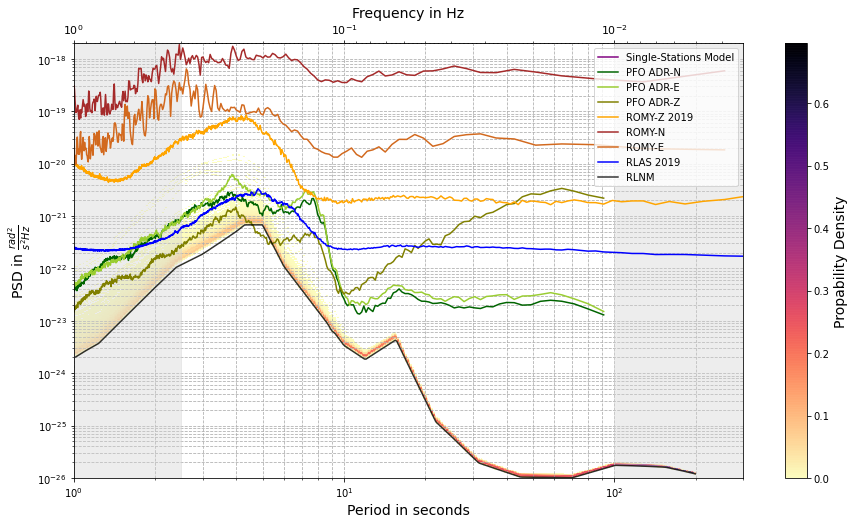

In [18]:
def __plot_rlnm_overview():
    
    font = 14

    fig, ax = plt.subplots(1,1,figsize=(15,8))

    ## add Frequency Axis
    g = lambda x: 1/x
    ax2 = ax.secondary_xaxis("top", functions=(g,g))
    ax2.set_xlabel("Frequency in Hz", fontsize=font, labelpad=5)
    ax2.set_xticklabels(1/periods, fontsize=11)
    
    ## single stations model
    plt.plot(ssm_period, ssm_median_psd, color="purple", zorder=2, label="Single-Stations Model")
        

    ## PFO data
    plt.plot(1/PFO_N['frequencies'], PFO_N_median_psd, color="darkgreen", zorder=2, label="PFO ADR-N")
    plt.plot(1/PFO_E['frequencies'], PFO_E_median_psd, color="yellowgreen", zorder=2, label="PFO ADR-E")
    plt.plot(1/PFO_Z['frequencies'], PFO_Z_median_psd, color="olive", zorder=2, label="PFO ADR-Z")
        
    ## romy data
    plt.plot(romy['frequencies'], romy_median_psd, color="orange", zorder=2, label="ROMY-Z 2019")
    
    # romy data
#     plt.plot(romy_2022['frequencies'], romy_2022_median_psd, color="pink", zorder=2, label="ROMY-Z 2022")

    ## romy zne data
    plt.plot(1/romy_zne['frequencies'], romy_zne['n_psd'], color="brown", zorder=2, label="ROMY-N")
    plt.plot(1/romy_zne['frequencies'], romy_zne['e_psd'], color="chocolate", zorder=2, label="ROMY-E")

    ## rlas data
    plt.plot(rlas['frequencies'], rlas_median_psd, color="blue", zorder=2, label="RLAS 2019")

    ## theoretical rlnm
#     plt.plot(periods, rlnm_psd, color="black", zorder=2, lw=2, label="RLNM")


    y_axis = 10**(output['bin_mids']/10)
    x_axis = output['period']

    ## plotting

    cmap = plt.cm.get_cmap('magma_r')
#     cmap = plt.cm.get_cmap('gray_r')
    cmap.set_under(color='white')

    im = plt.pcolor(x_axis, y_axis, output['dist'].T, 
                    cmap=cmap,
                    vmin=1e-12, 
                    alpha=0.99,
                   )
    
    ## add medians 
    medians = 10**(output['bins_medians']/10)
#     plt.plot(output['period'], medians, color="black", zorder=2, lw=0.5, alpha=0.8, ls=":", label="median")
    
    ## add minimas 
    minimas = 10**(output['bins_minimum']/10)
    plt.plot(output['period'], minimas, color="black", zorder=2, lw=1.5, alpha=0.8, label="RLNM")
    
    
    ## add colorbar
    caxes = fig.add_axes()
    cb = plt.colorbar(im, cax=caxes, alpha=1.0)
    cb.set_label("Propability Density", fontsize=font)
    
    
    plt.xscale("log")
    plt.yscale("log")

    plt.xlim(1, 300)

    ymin, ymax = 1e-26, 2e-18
    plt.ylim(ymin, ymax)
   
    plt.fill_betweenx(np.linspace(ymin,ymax,5), x1=0, x2=2.5, color="lightgrey", alpha=0.4, zorder=2)
    plt.fill_betweenx(np.linspace(ymin-10,ymax+10,5), x1=100, x2=300, color="lightgrey", alpha=0.4, zorder=2)


    plt.grid(axis="both", which="both", ls="--", zorder=0)
    plt.legend()

    plt.xlabel("Period in seconds", fontsize=font)
    plt.ylabel(r"PSD in $\frac{rad^2}{s^2 Hz}$",fontsize=font)

    plt.show();
    return fig 

fig = __plot_rlnm_overview()

In [ ]:
# fig.savefig(config['outdir_figures']+"Sequence/"+"Model_Data_Overview_Median_PSD_Distribution_SEQ5"+".png", fmt="png", bbox_inches="tight", dpi=300, transparent=None)
# fig.savefig(config['outdir_figures']+"Model_Data_Overview_Median_PSD_Distribution"+".png", fmt="png", bbox_inches="tight", dpi=300, transparent=None)

## PLOT with UNCERTAINTIES

In [ ]:
def __plot_rlnm_overview():
    
    font = 14

    fig, ax = plt.subplots(1,1,figsize=(15,8))

    ## add Frequency Axis
    g = lambda x: 1/x
    ax2 = ax.secondary_xaxis("top", functions=(g,g))
    ax2.set_xlabel("Frequency in Hz", fontsize=font, labelpad=5)
    ax2.set_xticklabels(1/periods, fontsize=11)   
    
    ## rlas data
    plt.plot(1/rlas['frequencies'], rlas_median_db, color="blue", zorder=2, label="RLAS")
    plt.fill_between(1/rlas['frequencies'], y1=rlas_upper_db, y2=rlas_lower_db, color="blue", alpha=0.3, zorder=2)

    ## PFO data
    plt.plot(1/PFO_N['frequencies'], PFO_N_median_db, color="darkgreen", zorder=2, label="PFO ADR-N")
#     plt.fill_between(1/rlas['frequencies'], y1=rlas_upper_db, y2=rlas_lower_db, color="darkgreen", alpha=0.3, zorder=2)    
    plt.plot(1/PFO_E['frequencies'], PFO_E_median_db, color="yellowgreen", zorder=2, label="PFO ADR-E")
#     plt.fill_between(1/rlas['frequencies'], y1=rlas_upper_db, y2=rlas_lower_db, color="darkgreen", alpha=0.3, zorder=2)    
    plt.plot(1/PFO_Z['frequencies'], PFO_Z_median_db, color="olive", zorder=2, label="PFO ADR-Z")
#     plt.fill_between(1/rlas['frequencies'], y1=rlas_upper_db, y2=rlas_lower_db, color="darkgreen", alpha=0.3, zorder=2)    
        
    ## romy data
    plt.plot(1/romy['frequencies'], romy_median_db, color="orange", zorder=2, label="ROMY-Z")
    plt.fill_between(1/romy['frequencies'], y1=romy_upper_db, y2=romy_lower_db, color="orange", alpha=0.3, zorder=1)

    ## single stations model
    plt.plot(ssm_period, ssm_db, color="purple", zorder=2, label="Single-Station")
    plt.fill_between(ssm_period, y1=ssm_upper_db, y2=ssm_lower_db, color="purple", alpha=0.3, zorder=1)
    
    ## theoretical rlnm
    plt.plot(periods, rlnm_db, color="black", zorder=2, lw=2, label="RLNM")
    plt.fill_between(periods, y1=rlnm_upper_db, y2=rlnm_lower_db, color="lightgrey", zorder=2)

    plt.xscale("log")

    plt.xlim(0.9, 300)

    ymin, ymax = -260, -180
    plt.ylim(ymin, ymax)
   
    plt.fill_betweenx(range(ymin,ymax), x1=0, x2=2.5, color="lightgrey", alpha=0.4, zorder=2)
    plt.fill_betweenx(range(ymin,ymax), x1=100, x2=300, color="lightgrey", alpha=0.4, zorder=2)



    plt.grid(axis="both", which="both", ls="--", zorder=0)
    plt.legend()

    plt.xlabel("Period in seconds", fontsize=font)
    plt.ylabel(r"PSD in dB (rel. to 1 $\frac{rad^2}{s^2 Hz}$)",fontsize=font)

    plt.show();
    return fig 

# fig = __plot_rlnm_overview()

In [ ]:
# fig.savefig(config['outdir_figures']+"Model_Data_Overview_DB"+".png", fmt="png", bbox_inches="tight", dpi=300, transparent=None)

## PLOT NO UNCERTAINTIES

In [ ]:
romy_2022 = read_pickle(inpath+"run_2022_ROMY-Z_3600_stats.pkl")
romy_2022_median_db =  __conversion(romy_2022['psds_median'], informat="PSD", outformat="DB")

In [ ]:
def __plot_rlnm_overview():
    
    font = 14

    fig, ax = plt.subplots(1,1,figsize=(15,8))

    ## add Frequency Axis
    g = lambda x: 1/x
    ax2 = ax.secondary_xaxis("top", functions=(g,g))
    ax2.set_xlabel("Frequency in Hz", fontsize=font, labelpad=5)
    ax2.set_xticklabels(1/periods, fontsize=11)   
    
    ## rlas data
    plt.plot(1/rlas['frequencies'], rlas_median_db, color="blue", zorder=2, label="RLAS")
#     plt.fill_between(1/rlas['frequencies'], y1=rlas_upper_db, y2=rlas_lower_db, color="blue", alpha=0.3, zorder=2)

    ## PFO data
    plt.plot(1/PFO_N['frequencies'], PFO_N_median_db, color="darkgreen", zorder=2, label="PFO ADR-N")
#     plt.fill_between(1/rlas['frequencies'], y1=rlas_upper_db, y2=rlas_lower_db, color="darkgreen", alpha=0.3, zorder=2)    
    plt.plot(1/PFO_E['frequencies'], PFO_E_median_db, color="yellowgreen", zorder=2, label="PFO ADR-E")
#     plt.fill_between(1/rlas['frequencies'], y1=rlas_upper_db, y2=rlas_lower_db, color="darkgreen", alpha=0.3, zorder=2)    
    plt.plot(1/PFO_Z['frequencies'], PFO_Z_median_db, color="olive", zorder=2, label="PFO ADR-Z")
#     plt.fill_between(1/rlas['frequencies'], y1=rlas_upper_db, y2=rlas_lower_db, color="darkgreen", alpha=0.3, zorder=2)    
        
    ## romy data
    plt.plot(1/romy['frequencies'], romy_median_db, color="orange", zorder=2, label="ROMY-Z")
#     plt.fill_between(1/romy['frequencies'], y1=romy_upper_db, y2=romy_lower_db, color="orange", alpha=0.3, zorder=1)
    #
    # romy data
    plt.plot(romy_2022['frequencies'], romy_2022_median_db, color="pink", zorder=2, label="ROMY-Z 2022")
#     plt.fill_between(1/romy['frequencies'], y1=romy_upper_db, y2=romy_lower_db, color="orange", alpha=0.3, zorder=1)

    ## single stations model
    plt.plot(ssm_period, ssm_db, color="purple", zorder=2, label="Single-Stations Model")
#     plt.fill_between(ssm_period, y1=ssm_upper_db, y2=ssm_lower_db, color="purple", alpha=0.3, zorder=1)
    
    ## theoretical rlnm
    plt.plot(periods, rlnm_db, color="black", zorder=2, lw=2, label="RLNM")
#     plt.fill_between(periods, y1=rlnm_upper_db, y2=rlnm_lower_db, color="lightgrey", zorder=2)

    plt.xscale("log")

    plt.xlim(0.9, 300)

    ymin, ymax = -270, -180
    plt.ylim(ymin, ymax)
   
    plt.fill_betweenx(range(ymin-10,ymax+10), x1=0, x2=2.5, color="lightgrey", alpha=0.4, zorder=2)
    plt.fill_betweenx(range(ymin-10,ymax+10), x1=100, x2=300, color="lightgrey", alpha=0.4, zorder=2)



    plt.grid(axis="both", which="both", ls="--", zorder=0)
    plt.legend()

    plt.xlabel("Period in seconds", fontsize=font)
    plt.ylabel(r"PSD in dB (rel. to 1 $\frac{rad^2}{s^2 Hz}$)",fontsize=font)

    plt.show();
    return fig 

# fig = __plot_rlnm_overview()

In [ ]:
# fig.savefig(config['outdir_figures']+"Model_Data_Overview_NoUncertainties_DB"+".png", fmt="png", bbox_inches="tight", dpi=300, transparent=None)

### PLOT MINIMIAL OVERVIEW

In [ ]:
def __moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

In [ ]:
# PFO_N_minimal_asd = __conversion(PFO_N['minimal'], informat="PSD", outformat="ASD")
# PFO_E_minimal_asd = __conversion(PFO_E['minimal'], informat="PSD", outformat="ASD")
# PFO_Z_minimal_asd = __conversion(PFO_Z['minimal'], informat="PSD", outformat="ASD")

# romy2 = read_csv(inpath+"run_N2019_ROMY-Z_3600.csv")
# romy2_minimal_asd =  __conversion(romy2['psds_minimal'], informat="PSD", outformat="ASD")
# romy2_minimal_asd_smooth = __moving_average(romy2_minimal_asd, 10)


# rlas2 = read_csv(inpath+"run_N2019_RLAS-Z_3600.csv")
# rlas2_minimal_asd =  __conversion(rlas2['psds_minimal'], informat="PSD", outformat="ASD")
# rlas2_minimal_asd_smooth = __moving_average(rlas2_minimal_asd, 10)

# rlnm_asd =  __conversion(rlnm['rlnm_psd_median'], informat="PSD", outformat="ASD")

In [ ]:
PFO_N_minimal_psd = PFO_N['minimal']
PFO_E_minimal_psd = PFO_E['minimal']
PFO_Z_minimal_psd = PFO_Z['minimal']

romy2 = read_csv(inpath+"run_N2019_ROMY-Z_3600.csv")
romy2_minimal_psd = romy2['psds_minimal']
romy2_minimal_psd_smooth = __moving_average(romy2_minimal_psd, 10)


rlas2 = read_csv(inpath+"run_N2019_RLAS-Z_3600.csv")
rlas2_minimal_psd =  rlas2['psds_minimal']
rlas2_minimal_psd_smooth = __moving_average(rlas2_minimal_psd, 10)

rlnm_psd = rlnm['rlnm_psd_median']

In [ ]:
def __plot_rlnm_overview():
    
    font = 14

    fig, ax = plt.subplots(1,1,figsize=(15,8))

    ## add Frequency Axis
    g = lambda x: 1/x
    ax2 = ax.secondary_xaxis("top", functions=(g,g))
    ax2.set_xlabel("Frequency in Hz", fontsize=font, labelpad=5)
    ax2.set_xticklabels(1/periods, fontsize=11)   
    
    ## rlas data
    plt.plot(1/rlas2['frequencies'], rlas2_minimal_psd_smooth, color="blue", zorder=2, label="RLAS")
    plt.plot(1/rlas2['frequencies'], rlas2_minimal_psd, color="blue", zorder=2, alpha=0.3)

    ## romy data
    plt.plot(1/romy2['frequencies'], romy2_minimal_psd_smooth, color="orange", zorder=2, label="ROMY-Z")
    plt.plot(1/romy2['frequencies'], romy2_minimal_psd, color="orange", zorder=2, alpha=0.3)

    ## PFO data
    plt.plot(1/PFO_N['frequencies'], PFO_N_minimal_psd, color="darkgreen", zorder=2, label="PFO ADR-N")
    plt.plot(1/PFO_E['frequencies'], PFO_E_minimal_psd, color="yellowgreen", zorder=2, label="PFO ADR-E")
    plt.plot(1/PFO_Z['frequencies'], PFO_Z_minimal_psd, color="olive", zorder=2, label="PFO ADR-Z")
        

    ## single stations model
#     plt.plot(ssm_period, ssm_db, color="purple", zorder=2, label="Single-Station")
#     plt.fill_between(ssm_period, y1=ssm_upper_db, y2=ssm_lower_db, color="purple", alpha=0.3, zorder=1)
    
    ## theoretical rlnm
    plt.plot(periods, rlnm_psd, color="black", zorder=2, lw=2, label="RLNM")
#     plt.fill_between(periods, y1=rlnm_upper_db, y2=rlnm_lower_db, color="lightgrey", zorder=2)

    plt.xscale("log")
    plt.yscale("log")

    plt.xlim(0.9, 200)
    
    ## ASD
#     ymin, ymax = 4e-14, 1e-10
    ## PSD
    ymin, ymax = 1e-26, 1e-20

    plt.ylim(ymin, ymax)     
    plt.fill_betweenx(np.linspace(ymin, ymax,5), x1=0, x2=2.5, color="lightgrey", alpha=0.4, zorder=2)
    plt.fill_betweenx(np.linspace(ymin, ymax,5), x1=100, x2=300, color="lightgrey", alpha=0.4, zorder=2)


    plt.grid(axis="both", which="both", ls="--", zorder=0)
    plt.legend()

    plt.xlabel("Period in seconds", fontsize=font)
    plt.ylabel(r"PSD in $\frac{rad^2}{s^2 Hz}$",fontsize=font)

    plt.show();
    return fig 

fig = __plot_rlnm_overview()

In [ ]:
# fig.savefig(config['outdir_figures']+"Model_Data_Overview_Minimal_PSD"+".png", fmt="png", bbox_inches="tight", dpi=300, transparent=None)

## PLOT Median Overview ASD

In [ ]:
PFO_N_median_psd = PFO_N['median']
PFO_E_median_psd = PFO_E['median']
PFO_Z_median_psd = PFO_Z['median']

romy3 = read_csv(inpath+"run_N2019_ROMY-Z_3600.csv")
romy3_median_psd = romy2['psds_median']
romy3_median_psd_smooth = __moving_average(romy2_median_psd, 10)

rlas3 = read_csv(inpath+"run_N2019_RLAS-Z_3600.csv")
rlas3_median_psd =  rlas2['psds_median']
rlas3_median_psd_smooth = __moving_average(rlas2_median_psd, 10)

romy_2022 = read_pickle(inpath+"run_2022_ROMY-Z_3600_stats.pkl")
romy_2022_median_psd = romy_2022['psds_median']

rlnm_psd = rlnm['rlnm_psd_median']

ssm_psd = ssm['median']

romy_zne = read_pickle("/export/data/LNM/data/ROMY_ZNE/"+"romy_zne.pkl")

In [ ]:
def __plot_rlnm_overview():
    
    font = 14

    fig, ax = plt.subplots(1,1,figsize=(15,8))

    ## add Frequency Axis
    g = lambda x: 1/x
    ax2 = ax.secondary_xaxis("top", functions=(g,g))
    ax2.set_xlabel("Frequency in Hz", fontsize=font, labelpad=5)
    ax2.set_xticklabels(1/periods, fontsize=11)   
    
    ## single stations model
    plt.plot(ssm_period, ssm_psd, color="purple", zorder=2, label="Single-Stations Model")
        

    ## PFO data
    plt.plot(1/PFO_N['frequencies'], PFO_N_median_psd, color="darkgreen", zorder=2, label="PFO ADR-N")
    plt.plot(1/PFO_E['frequencies'], PFO_E_median_psd, color="yellowgreen", zorder=2, label="PFO ADR-E")
    plt.plot(1/PFO_Z['frequencies'], PFO_Z_median_psd, color="olive", zorder=2, label="PFO ADR-Z")
        
    ## romy data
    plt.plot(1/romy['frequencies'], romy3_median_psd, color="orange", zorder=2, label="ROMY-Z 2019")
    
    # romy data
    plt.plot(romy_2022['frequencies'], romy_2022_median_psd, color="pink", zorder=2, label="ROMY-Z 2022")

    ## rlas data
    plt.plot(1/romy_zne['frequencies'], romy_zne['n_psd'], color="brown", zorder=2, label="ROMY-N")
    plt.plot(1/romy_zne['frequencies'], romy_zne['e_psd'], color="chocolate", zorder=2, label="ROMY-E")

    ## rlas data
    plt.plot(1/rlas['frequencies'], rlas3_median_psd, color="blue", zorder=2, label="RLAS 2019")

    ## theoretical rlnm
    plt.plot(periods, rlnm_psd, color="black", zorder=2, lw=2, label="RLNM")

    plt.xscale("log")
    plt.yscale("log")

    plt.xlim(1, 300)

    ymin, ymax = 1e-26, 2e-18
    plt.ylim(ymin, ymax)
   
    plt.fill_betweenx(np.linspace(ymin,ymax,5), x1=0, x2=2.5, color="lightgrey", alpha=0.4, zorder=2)
    plt.fill_betweenx(np.linspace(ymin-10,ymax+10,5), x1=100, x2=300, color="lightgrey", alpha=0.4, zorder=2)


    plt.grid(axis="both", which="both", ls="--", zorder=0)
    plt.legend()

    plt.xlabel("Period in seconds", fontsize=font)
    plt.ylabel(r"PSD in $\frac{rad^2}{s^2 Hz}$",fontsize=font)

    plt.show();
    return fig 

fig = __plot_rlnm_overview()

In [ ]:
# fig.savefig(config['outdir_figures']+"Model_Data_Overview_Median_PSD_all"+".png", fmt="png", bbox_inches="tight", dpi=300, transparent=None)

### Next Plot Idea